<a href="https://colab.research.google.com/github/vajihe-ameri/predict-software-bugs-in-java-classes/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install sklearn pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=330d95ce256cd23fb46e41514ab84a0e7700217c892b628b9c4837fed2ef7a8a
  Stored in directory: /root/.cache/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
Successfully built sklearn


In [1]:
import pandas as pd
from google.colab import drive 
drive = drive.mount('/content/drive') 

Mounted at /content/drive


In [5]:
!pip install tensorflow-addons
import tensorflow_addons
f_measure = tensorflow_addons.metrics.F1Score(num_classes=3, average='micro', threshold=0.5)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
test_features = pd.read_csv("/content/drive/MyDrive/new_df/test_set.csv")
train_features = pd.read_csv("/content/drive/MyDrive/new_df/train_set.csv")
test_target = pd.read_csv("/content/drive/MyDrive/new_df/test_set_NB.csv")
train_target = pd.read_csv("/content/drive/MyDrive/new_df/train_set_NB.csv")

In [7]:
from keras.models import Sequential
from keras.layers import Dense

In [8]:
model = Sequential()

model.add(Dense(40, kernel_initializer = 'uniform', activation = 'relu', input_dim = train_features.shape[1]))
model.add( Dense(30, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(3, kernel_initializer = 'uniform', activation = 'softmax'))

In [9]:
model.compile(optimizer= 'sgd', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                3400      
                                                                 
 dense_1 (Dense)             (None, 30)                1230      
                                                                 
 dense_2 (Dense)             (None, 3)                 93        
                                                                 
Total params: 4,723
Trainable params: 4,723
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(train_features, train_target['Number of Bugs'], batch_size = 128, epochs = 1000,  validation_split=0.2)

Epoch 1/1000
154/154 [==============================] - 1s 4ms/step - loss: 1.0752 - accuracy: 0.4166 - val_loss: 1.3126 - val_accuracy: 0.0000e+00
Epoch 2/1000
154/154 [==============================] - 1s 3ms/step - loss: 1.0485 - accuracy: 0.4191 - val_loss: 1.4571 - val_accuracy: 0.0000e+00
Epoch 3/1000
154/154 [==============================] - 0s 3ms/step - loss: 1.0375 - accuracy: 0.4160 - val_loss: 1.5580 - val_accuracy: 0.0000e+00
Epoch 4/1000
154/154 [==============================] - 0s 3ms/step - loss: 1.0326 - accuracy: 0.4162 - val_loss: 1.6232 - val_accuracy: 0.0000e+00
Epoch 5/1000
154/154 [==============================] - 1s 3ms/step - loss: 1.0304 - accuracy: 0.4168 - val_loss: 1.6717 - val_accuracy: 0.0000e+00
Epoch 6/1000
154/154 [==============================] - 0s 3ms/step - loss: 1.0293 - accuracy: 0.4162 - val_loss: 1.7053 - val_accuracy: 0.0000e+00
Epoch 7/1000
154/154 [==============================] - 0s 3ms/step - loss: 1.0287 - accuracy: 0.4164 - val_loss

In [12]:
import matplotlib.pyplot as plt

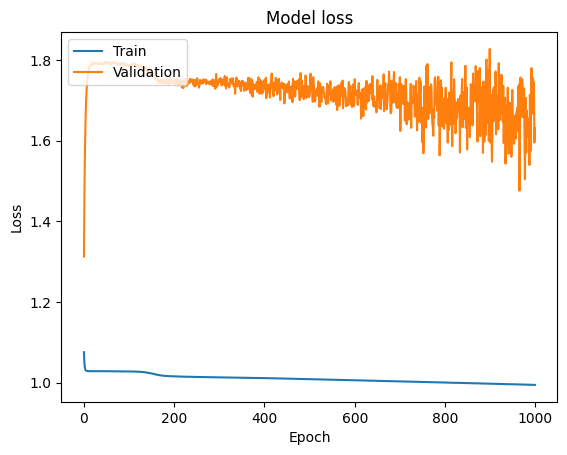

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

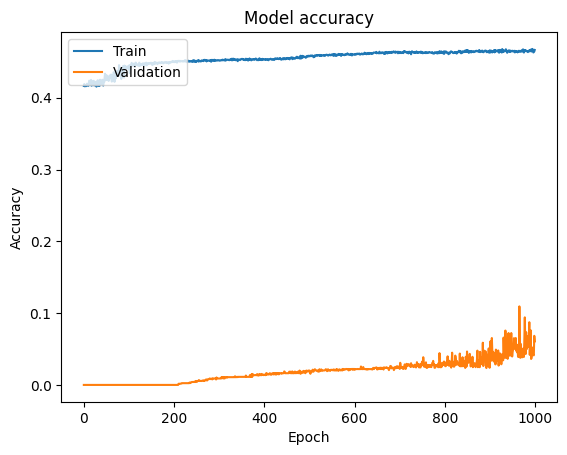

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()



*********************************************
Test-set evaluate result:

131/131 [==============================] - 0s 1ms/step - loss: 1.0193 - accuracy: 0.4390
[1.0193063020706177, 0.4390419125556946]
131/131 [==============================] - 0s 931us/step
Report for test set:

               precision    recall  f1-score   support

     class 0       0.57      0.54      0.55      2042
     class 1       0.32      0.52      0.40      1327
     class 2       0.44      0.05      0.09       806

    accuracy                           0.44      4175
   macro avg       0.44      0.37      0.35      4175
weighted avg       0.47      0.44      0.41      4175



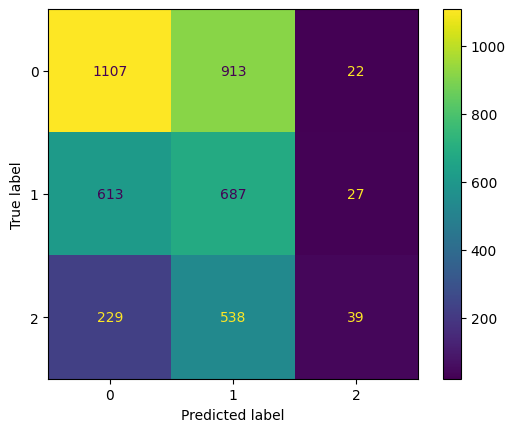



*********************************************
Train-set evaluate result:

766/766 [==============================] - 1s 2ms/step - loss: 1.1211 - accuracy: 0.3872
[1.1211367845535278, 0.38722848892211914]
766/766 [==============================] - 1s 1ms/step
Report for train set:

               precision    recall  f1-score   support

     class 0       0.44      0.55      0.49      8164
     class 1       0.33      0.55      0.42      8164
     class 2       0.76      0.06      0.11      8164

    accuracy                           0.39     24492
   macro avg       0.51      0.39      0.34     24492
weighted avg       0.51      0.39      0.34     24492



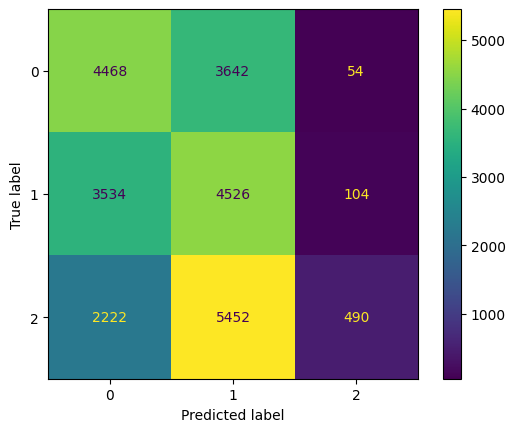

In [15]:
import numpy
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
target_names = ['class 0', 'class 1', 'class 2']

print("\n\n*********************************************\nTest-set evaluate result:\n")

print(model.evaluate(test_features, test_target))
test_prediction_points = model.predict(test_features)  #Probability of each class
test_prediction = numpy.argmax(test_prediction_points, axis=1)

print("Report for test set:\n\n", classification_report(test_target, test_prediction, target_names=target_names))
test_confusion_matrix = confusion_matrix(test_target, test_prediction)
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_confusion_matrix)
test_disp.plot()
plt.show()

print("\n\n*********************************************\nTrain-set evaluate result:\n")

print(model.evaluate(train_features, train_target))
train_prediction_points = model.predict(train_features)  #Probability of each class
train_prediction = numpy.argmax(train_prediction_points, axis=1)

print("Report for train set:\n\n", classification_report(train_target, train_prediction, target_names=target_names))
train_confusion_matrix = confusion_matrix(train_target, train_prediction)
train_disp = ConfusionMatrixDisplay(confusion_matrix=train_confusion_matrix)
train_disp.plot()
plt.show()

In [16]:
test_loss, test_accuracy = model.evaluate(test_features, test_target)

131/131 [==============================] - 0s 1ms/step - loss: 1.0193 - accuracy: 0.4390
